In [183]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df_fp = pd.read_csv("data/fp_data.csv", index_col=0)
df_gk = pd.read_csv("data/gk_data.csv", index_col=0)
pd.set_option('display.max_columns', None)

In [185]:
# show numbers with 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [186]:
df_fp.head()

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,main_position,all_positions,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,international_reputation,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,112000000.000,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,Rechtsaußen,"RW, CF, ST",FC Barcelona,LaLiga,1,1,Argentinien,1,0,138,5,94,94,Left,4,4,Medium/Low,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,60000000.000,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Linksaußen,"ST, LW",Juventus Turin,Serie A,1,1,Portugal,1,0,164,5,93,93,Right,4,5,High/Low,90,93,82,89,35,78,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,128000000.000,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,Linksaußen,"LW, CAM",FC Paris Saint-Germain,Ligue 1,1,1,Brasilien,1,0,102,5,92,92,Right,5,5,High/Medium,91,85,87,95,32,58,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,80000000.000,Eden Hazard,Eden Hazard,1991,28,175,74,Belgium,Linksaußen,"LW, CF",Real Madrid,LaLiga,1,1,Belgien,1,0,106,4,91,91,Right,4,4,High/Medium,91,83,86,94,35,66,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
4,120000000.000,Kevin De Bruyne,Kevin De Bruyne,1991,28,181,70,Belgium,Offensives Mittelfeld,"CAM, CM",Manchester City,Premier League,1,1,Belgien,1,0,74,4,91,91,Right,5,4,High/High,76,86,92,86,61,78,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73


In [187]:
df_fp["market_value_€"].describe()

count       10979.000
mean      2907293.469
std       8017991.462
min         25000.000
25%        325000.000
50%        625000.000
75%       1800000.000
max     180000000.000
Name: market_value_€, dtype: float64

In [192]:
def plot_hist(df, feature, title):
    
    #feature_mean = round(df["{}".format(feature)].mean())
    feature_mean = round(df[f"{feature}"].mean()).astype("int64")

    plt.figure(figsize=(15,5))

    ax = sns.distplot(df[f"{feature}"], kde=True, bins = 15,
                     kde_kws={"color": "k", "lw": 2, "label": "KDE"})

    plt.ticklabel_format(style='plain', axis='x')
    ax.tick_params(labelsize=14)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.axvline(feature_mean, color='b', linestyle='dashed', linewidth=2, ymax=0.95, label=f"Mean: {feature_mean:,d}")

    ax.set_ylabel("Count", fontsize = 16)
    ax.set_xlabel(f"{feature}", fontsize = 16)
    ax.set_title(f"{title}",fontsize = 20)
    
    if feature == "market_value_€":
        
        import matplotlib.ticker as plticker
        
        plt.xticks(rotation='vertical')

        #set tick every 10 Mio €
        tick_spacing = 10000000
        loc = plticker.MultipleLocator(tick_spacing)
        ax.xaxis.set_major_locator(loc)
        
        plt.legend()
        plt.show();
    
    else:
        plt.legend()
        plt.show();

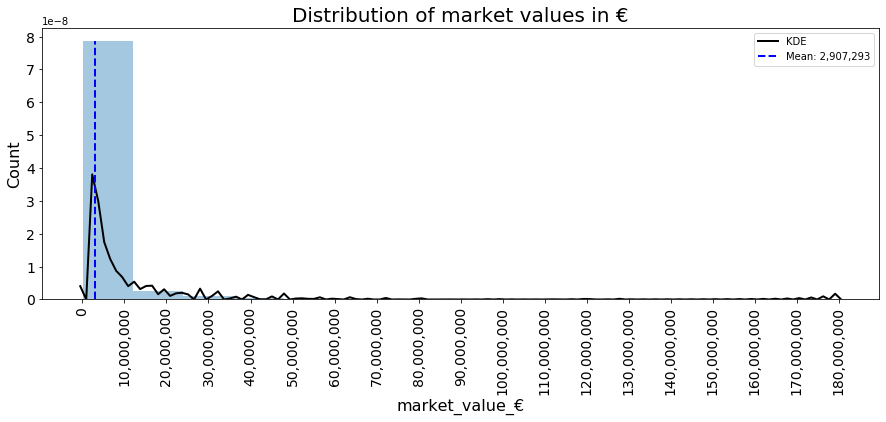

In [193]:
plot_hist (df_fp, "market_value_€", "Distribution of market values in €")

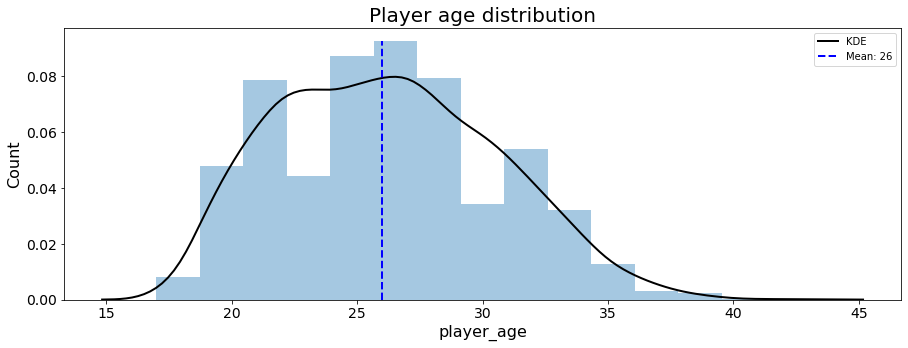

In [194]:
plot_hist (df_fp, "player_age", "Player age distribution")